In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd #for performing complete SVD
from sklearn.decomposition import TruncatedSVD #for performing truncated SVD
#for image manipilation
from skimage.color import rgb2gray
from skimage import data


The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. </br> 

**SVD Theorem**: Let $M$ be a $m \times n$ matrix of rank $r$. Then: $$ M = U \Sigma V^T, $$
where
- $𝑈$ is a $𝑚 \times 𝑟$ column-orthonormal matrix.
- $𝑉$ is a $𝑛 \times 𝑟$ column-orthonormal matrix. 
- $\Sigma$ is a $𝑟 \times 𝑟$ diagonal matrix contaning the singular values.




In this tutorial we will look into:
- Computing the full SVD decomposition (https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)
- Computing truncated SVD decomposition, i.e., the case where we specify how many singular components we want to keep. In other words the desired dimensionality of the reduced data. (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

### SVD for image compression
We will perform the full SVD decomposition.

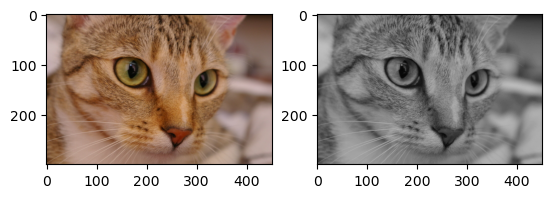

In [12]:
#fetching cat image
cat = data.chelsea()
# convert to grayscale
grey_cat = rgb2gray(cat)

#plotting the two images
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(grey_cat, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [23]:
# calculate the SVD and plot the image
U, S, V_T = svd(gray_cat, full_matrices = False)
S = np.diag(S) #making the sigular value into a diagonal matrix

print('Dimensions of the original matrix M (gray scales cat image): ', gray_cat.shape) 
print('Dimensions of the U matrix: ', U.shape) 
print('Dimensions of the Sigma diagonal matrix (S): ', S.shape) 
print('Dimensions of the V^T matrix: ', V_T.shape) 

Dimensions of the original matrix M (gray scales cat image):  (300, 451)
Dimensions of the U matrix:  (300, 300)
Dimensions of the Sigma diagonal matrix (S):  (300, 300)
Dimensions of the V^T matrix:  (300, 451)


Let us now reconstruct the gray scale image back from the estimated $U \Sigma V^T$ matrices by using a range of singular components.

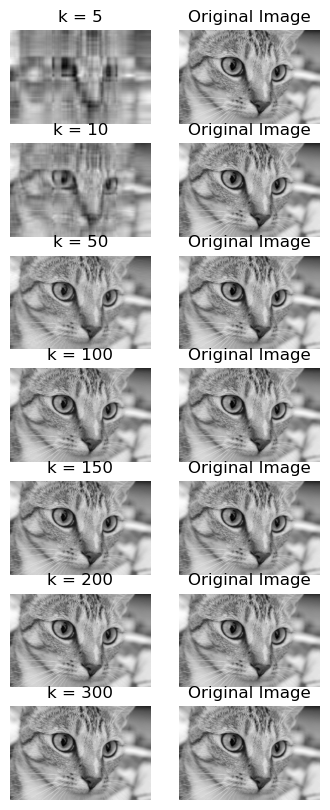

In [30]:
fig, ax = plt.subplots(7, 2, figsize=(4, 10))
curr_fig = 0
for r in [5, 10, 50, 100, 150, 200, 300]:  #by selecting first r singular components
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]  #approximated cat image based on first r singular values
    ax[curr_fig][0].imshow(cat_approx, cmap='gray') 
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()

### Truncated SVD
A variant of SVD that only computes the largest singular values, where it is a user-specified parameter $k$. The truncated SVD applied to training data matrix with $n$ features and $m$ samples $X_{m\times n}$ produces a low-rank approximation of the matrix $X$ ($k < n$): 
$$ X \approx X_k = U_k \Sigma_k V^T_k.$$

- $U_k \Sigma_k$ is the transformed/reduced training data with $k$ features. 

In [81]:
#initiating the model with user input of how many sigular values to keep 'n_components'
svd_trunc = TruncatedSVD(n_components = 10, n_iter = 7, random_state=42)
#dimension reduced feature matrix
gray_cat_reduced = svd_trunc.fit_transform(gray_cat)

Read the user guide of TruncatedSVD and answer the following:
- What are the matrices/arrays whose dimensions are printed below?
- How can you get the approximation of the original 'gray_cat' matrix back from the objects in 'svd_trunc' model? 

In [82]:
gray_cat.shape

(300, 451)

In [83]:
gray_cat_reduced.shape

(300, 10)

In [84]:
svd_trunc.components_.shape

(10, 451)

In [85]:
svd_trunc.singular_values_.shape

(10,)